## Email ingester - Outlook Exchange

In [1]:
# https://pypi.python.org/pypi/exchangelib/
# https://stackoverflow.com/questions/288546/connect-to-exchange-mailbox-with-python#3072491

# from exchangelib import DELEGATE, Account, Credentials
import exchangelib as el
import os
import zipfile
import pandas as pd
import glob

## Extracting zipped files

In [2]:
# Extracts zipped files into the same folder

dir_name = r'C:\\Users\\csala\\Documents\\jan\\WiFi data\\Data'
extension = r'.zip'

os.chdir(dir_name) # change directory from working dir to dir with files

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = os.path.abspath(item) # get full path of files
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(dir_name) # extract file to dir
        zip_ref.close() # close file
        os.remove(file_name) # delete zipped file

## Collating csv files into one master file, appending any new data

In [5]:
files_to_collate = glob.glob('Occupancy_Monitor_Client_Count_-_Most_Buildings_*.csv')
headers = ['Key','Event Time','Associated Client Count','Authenticated Client Count']
df_list = pd.DataFrame(columns = headers)
#df_list = []

In [6]:
df_list

,Key,Event Time,Associated Client Count,Authenticated Client Count


In [7]:
df_list=[]
#list of dataframes
#the diff with previous one is that each of these gets its own space reserved in the memory so its much faster to join them later
for filename in files_to_collate:
    df_list.append(pd.read_csv(filename, skiprows=8,header=None))

In [8]:
len(df_list)

764

In [9]:
#concat list of dataframes
master_df=pd.concat(df_list)

In [10]:
master_df.to_csv('output.csv')

In [11]:
master_df.columns=headers

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

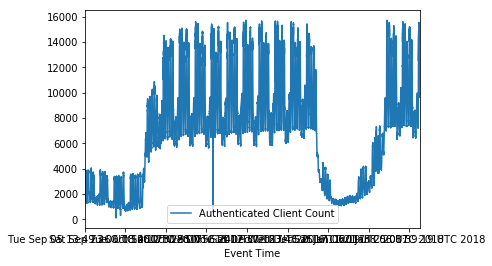

In [13]:
master_df.set_index('Key').loc['total'].set_index('Event Time')[['Authenticated Client Count']].astype(int).plot()

In [14]:
master_df.set_index('Key').loc['total']

,Event Time,Associated Client Count,Authenticated Client Count
Key,,,
total,Tue Sep 05 13:49:26 UTC 2017,3987,3839
total,Tue Sep 05 13:54:27 UTC 2017,3977,3829
total,Tue Sep 05 13:59:32 UTC 2017,3997,3851
total,Tue Sep 05 14:04:32 UTC 2017,3978,3816
total,Tue Sep 05 14:09:33 UTC 2017,3939,3806
total,Tue Sep 05 14:14:41 UTC 2017,3920,3768
total,Tue Sep 05 14:20:04 UTC 2017,3875,3740
total,Tue Sep 05 14:24:45 UTC 2017,3852,3684
total,Tue Sep 05 14:29:54 UTC 2017,3842,3666


In [15]:
import numpy as np

In [16]:
master_df=master_df.reset_index()

In [17]:
good_index=[] #only keep entries which have > in them
for i in master_df['Key'].T.iteritems():
    if '>' in i[1]:
        good_index.append(i[0])

In [18]:
master_df_filtered=master_df.loc[good_index]

In [19]:
#!!! LOTS of memory required for this step
locations=np.array(master_df_filtered['Key'].str.split('>').tolist()).T

In [20]:
master_df_filtered['Uni']=locations[0]
master_df_filtered['Building']=locations[1]
master_df_filtered['Floor']=locations[2]

In [24]:
df=master_df_filtered.drop(['index','Key','Authenticated Client Count','Uni'],axis=1)

In [26]:
set(list(df['Building'].values))

{' Alex Square ',
 ' Bailrigg House ',
 ' Barker House Farm ',
 ' Bowland Annexe ',
 ' Bowland Ash ',
 ' Bowland Main ',
 ' Bowland North ',
 ' Bowland Twr (Old Bowland Annexe) ',
 ' CETAD ',
 ' Central Workshops ',
 ' Chaplaincy Centre ',
 ' Charles Carter ',
 ' Conference Centre ',
 ' County ',
 ' County Field ',
 ' County South/Cartmel ',
 ' Energy Centre ',
 ' Engineering ',
 ' FU Hse 71-74 ',
 ' FY Hse 65-70 ',
 ' Faraday and cTAP ',
 ' Field Station ',
 ' Furness ',
 ' Furness outer ',
 ' Fylde ',
 ' George Fox ',
 ' Graduate College ',
 ' Great Hall ',
 ' Grizedale ',
 ' Hazelrigg ',
 ' Hse 75 77 ',
 ' Human Resources ',
 ' ISS Building ',
 ' Infolab ',
 ' Institute for Advanced Studies ',
 ' John Creed ',
 ' LEC ',
 ' LICA ',
 ' Library ',
 ' Lonsdale College (SW) ',
 ' MDC ',
 ' Management School ',
 ' New Engineering ',
 ' Pendle ',
 ' Physics ',
 ' Postgrad Stats (PSC) ',
 ' Preschool ',
 ' Reception ',
 ' Round House - LUTV ',
 ' Ruskin Library ',
 ' SW hse 12-16 ',
 ' SW h

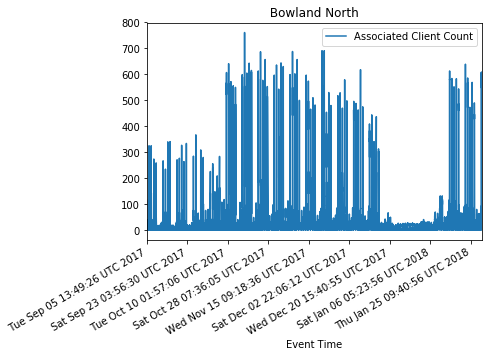

In [25]:
building=' Bowland North '
df.set_index('Building').loc[building].set_index('Event Time')[['Associated Client Count']].astype(int).plot(title=building)
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.show()

## Read and select BMS data

In [40]:
dir_name = r'C:\\Users\\csala\\Documents\\jan\\EMS'
os.chdir(dir_name) # change directory from working dir to dir with files
files_to_collate = glob.glob('ems-*.csv')

In [41]:
files_to_collate

['ems-dec-2017.csv',
 'ems-feb-2018.csv',
 'ems-jan-2018.csv',
 'ems-nov-2017.csv',
 'ems-oct-2017.csv',
 'ems-sep-2017.csv']

In [43]:
df_list=[]
#list of dataframes
#the diff with previous one is that each of these gets its own space reserved in the memory so its much faster to join them later
for filename in files_to_collate:
    df_list.append(pd.read_csv(filename))

In [45]:
ems=pd.concat(df_list)

In [47]:
emm=pd.read_csv('emsmeta.csv')

In [65]:
emm.set_index('id').loc[[102,103,104]]

,node_id,network_collection,network_domain,subnet_description,subnet_collection,node_description,node_collection,input_description,input_collection,data_unit,storage_method,storage_duration,meter_constants
id,,,,,,,,,,,,,
102,050157B3C100,Com 1,Net_01,Bowland North Switch Room,6,Meters,1,Electric Meter,1,kWh,Minutely,30,1
103,050157B3C100,Com 1,Net_01,Bowland North Switch Room,6,Meters,1,Water Meter,2,m3,Minutely,30,1
104,050157B3C100,Com 1,Net_01,Bowland North Switch Room,6,Meters,1,Heat Meter,3,kWh,Minutely,30,1


In [68]:
dg=ems.set_index('metadata_id').loc[[102,103,104]]

In [53]:
wifi=df.set_index('Building').loc[building].set_index('Event Time')[['Associated Client Count']].astype(int)

In [58]:
wifi.index.name='time'
wifi.columns=['wifi']

In [71]:
el=dg.loc[102].set_index('timestamp')[['consumption']]
el.index.name='time'
el.columns=['electricity']
wa=dg.loc[103].set_index('timestamp')[['consumption']]
wa.index.name='time'
wa.columns=['water']
he=dg.loc[104].set_index('timestamp')[['consumption']]
he.index.name='time'
he.columns=['heat']

In [77]:
he=he.sort_index()
wa=wa.sort_index()
el=el.sort_index()
wifi=wifi.sort_index()

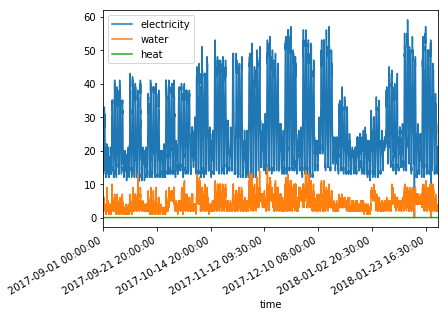

In [90]:
fig,ax=plt.subplots(1,1)
#wifi.plot(ax=ax)
el.plot(ax=ax)
wa.plot(ax=ax)
he.plot(ax=ax)
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.show()

In [97]:
from datetime import datetime

In [132]:
ni=[]
for i in wifi.index:
    ni.append(datetime.strptime(i[4:19]+' '+i[-4:],'%b %d %X %Y'))

In [133]:
wifi['ni']=ni

In [136]:
wifi=wifi.set_index('ni').sort_index()
wifi.index.name='time'

In [140]:
wifi.index=pd.to_datetime(wifi.index)
he.index=pd.to_datetime(he.index)
wa.index=pd.to_datetime(wa.index)
el.index=pd.to_datetime(el.index)

In [149]:
el[['electricity']]*1.0/max(el['electricity'])

,electricity
time,
2017-09-01 00:00:00,0.237288
2017-09-01 00:30:00,0.237288
2017-09-01 01:00:00,0.254237
2017-09-01 01:30:00,0.237288
2017-09-01 02:00:00,0.237288
2017-09-01 02:30:00,0.220339
2017-09-01 03:00:00,0.220339
2017-09-01 03:30:00,0.220339
2017-09-01 04:00:00,0.220339


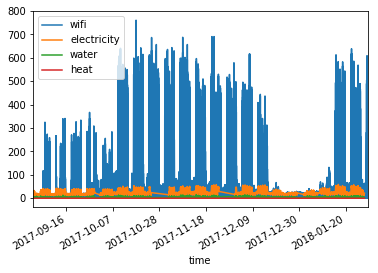

In [141]:
fig,ax=plt.subplots(1,1)
wifi.plot(ax=ax)
el.plot(ax=ax)
wa.plot(ax=ax)
he.plot(ax=ax)
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.show()

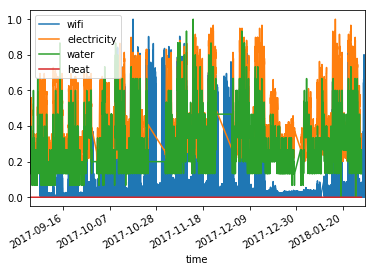

In [162]:
el[['electricity']]*1.0/max(el['electricity'])
fig,ax=plt.subplots(1,1)
pd.DataFrame(wifi[['wifi']]*1.0/max(wifi['wifi'])).plot(ax=ax)
pd.DataFrame(el[['electricity']]*1.0/max(el['electricity'])).plot(ax=ax)
pd.DataFrame(wa[['water']]*1.0/max(wa['water'])).plot(ax=ax)
#pd.DataFrame(he[['heat']]*1.0/max(he['heat'])).plot(ax=ax)
he.plot(ax=ax)
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.show()

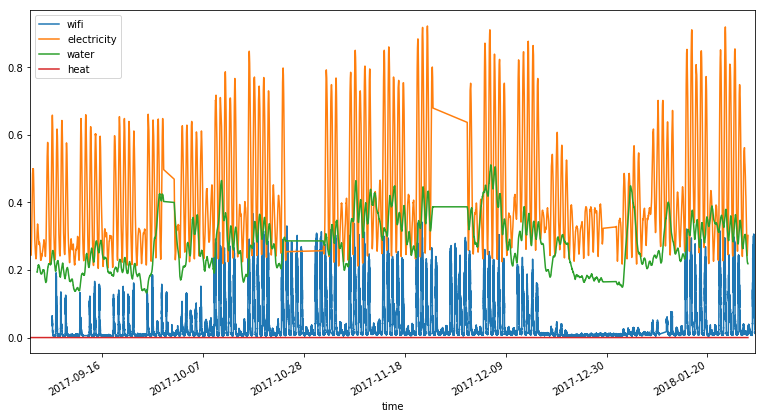

In [172]:
el[['electricity']]*1.0/max(el['electricity'])
fig,ax=plt.subplots(1,1,figsize=(13,7))
pd.DataFrame(wifi[['wifi']]*1.0/max(wifi['wifi'])).rolling(window=12).mean().plot(ax=ax)
pd.DataFrame(el[['electricity']]*1.0/max(el['electricity'])).rolling(window=12).mean().plot(ax=ax)
pd.DataFrame(wa[['water']]*1.0/max(wa['water'])).rolling(window=12*6).mean().plot(ax=ax)
#pd.DataFrame(he[['heat']]*1.0/max(he['heat'])).plot(ax=ax)
he.plot(ax=ax)
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.show()

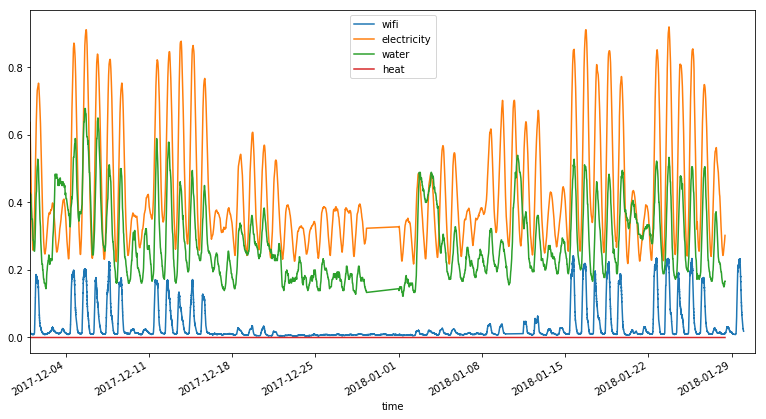

In [176]:
el[['electricity']]*1.0/max(el['electricity'])
fig,ax=plt.subplots(1,1,figsize=(13,7))
m=12
pd.DataFrame(wifi[['wifi']]*1.0/max(wifi['wifi'])).rolling(window=m*10).mean().plot(ax=ax)
pd.DataFrame(el[['electricity']]*1.0/max(el['electricity'])).rolling(window=m).mean().plot(ax=ax)
pd.DataFrame(wa[['water']]*1.0/max(wa['water'])).rolling(window=m).mean().plot(ax=ax)
#pd.DataFrame(he[['heat']]*1.0/max(he['heat'])).plot(ax=ax)
he.plot(ax=ax)
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.xlim(['2017-12-01','2018-01-31'])
plt.show()

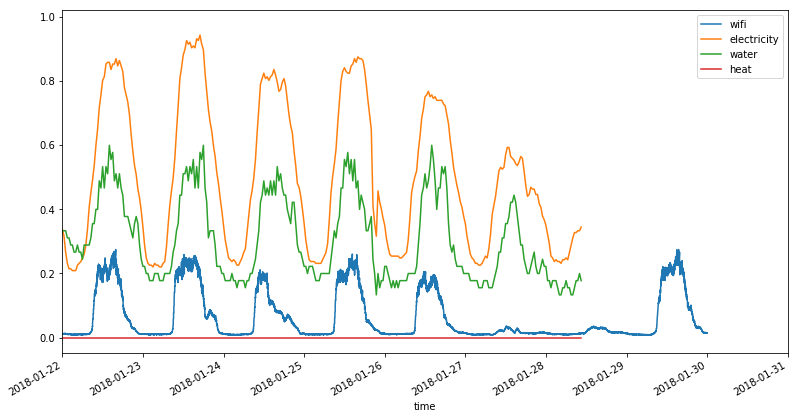

In [182]:
el[['electricity']]*1.0/max(el['electricity'])
fig,ax=plt.subplots(1,1,figsize=(13,7))
m=3
pd.DataFrame(wifi[['wifi']]*1.0/max(wifi['wifi'])).rolling(window=m*10).mean().plot(ax=ax)
pd.DataFrame(el[['electricity']]*1.0/max(el['electricity'])).rolling(window=m).mean().plot(ax=ax)
pd.DataFrame(wa[['water']]*1.0/max(wa['water'])).rolling(window=m).mean().plot(ax=ax)
#pd.DataFrame(he[['heat']]*1.0/max(he['heat'])).plot(ax=ax)
he.plot(ax=ax)
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.xlim(['2018-01-22','2018-01-31'])
plt.show()